In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis of GPT3-Scores with the Manual Annotations

In [2]:
with open('gpt3.json', 'r') as file:
    gpt3 = json.load(file)
with open('gpt3_ngram_scores.json', 'r') as file:
    gpt3_ngram = json.load(file)
with open('gpt3_bertscores.json', 'r') as file:
    gpt3_bert = json.load(file)
with open('gpt3_mqag_scores.json', 'r') as file:
    gpt3_mqag = json.load(file)

In [3]:
gpt3_ngram_scores = []
for i in range(len(gpt3_ngram['ngram'])):
    gpt3_ngram_scores += gpt3_ngram['ngram'][i]['sent_level']['avg_neg_logprob'] 

In [4]:
gpt3_bert_scores = []
for i in range(len(gpt3_bert['bertscore'])):
    gpt3_bert_scores += gpt3_bert['bertscore'][i]

In [5]:
gpt3_mqag_scores = []
for i in range(len(gpt3_mqag['mqag'])):
    gpt3_mqag_scores += gpt3_mqag['mqag'][i]

In [6]:
true_annot = []
for i in range(len(gpt3)):
    true_annot += gpt3[i]['annotation']
gpt3_ngram_scores = np.asarray(gpt3_ngram_scores)
true_annot = np.asarray(true_annot)

In [7]:
gpt3_ngram_data = pd.concat([pd.Series(gpt3_ngram_scores), pd.Series(true_annot)], axis = 1)
gpt3_ngram_data.columns = ['Unigram Score', 'Annotation']

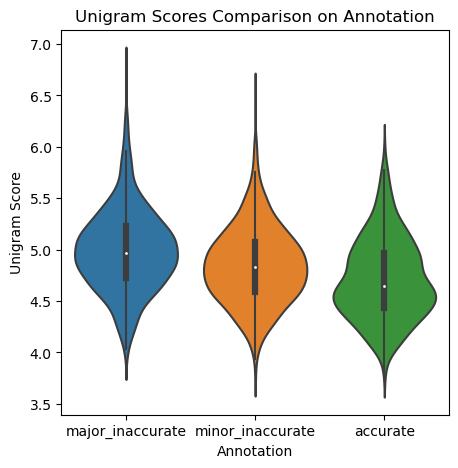

In [8]:
plt.figure(figsize = (5, 5))
sns.violinplot(x = 'Annotation', y = 'Unigram Score', data = gpt3_ngram_data)
plt.title('Unigram Scores Comparison on Annotation')
plt.savefig('Unigram Scores Comparison on Annotation.png')
plt.show()

In [9]:
gpt3_bert_data = pd.concat([pd.Series(gpt3_bert_scores), pd.Series(true_annot[:len(gpt3_bert_scores)])], axis = 1)
gpt3_bert_data.columns = ['BERT Score', 'Annotation']

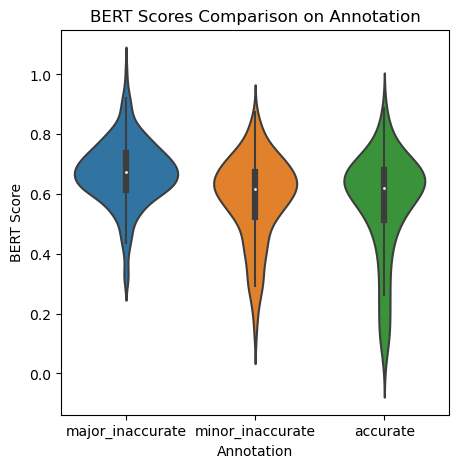

In [10]:
plt.figure(figsize = (5, 5))
sns.violinplot(x = 'Annotation', y = 'BERT Score', data = gpt3_bert_data)
plt.title('BERT Scores Comparison on Annotation')
plt.savefig('BERT Scores Comparison on Annotation.png')
plt.show()

In [11]:
gpt3_mqag_data = pd.concat([pd.Series(gpt3_mqag_scores), pd.Series(true_annot[:len(gpt3_mqag_scores)])], axis = 1)
gpt3_mqag_data.columns = ['MQAG Score', 'Annotation']

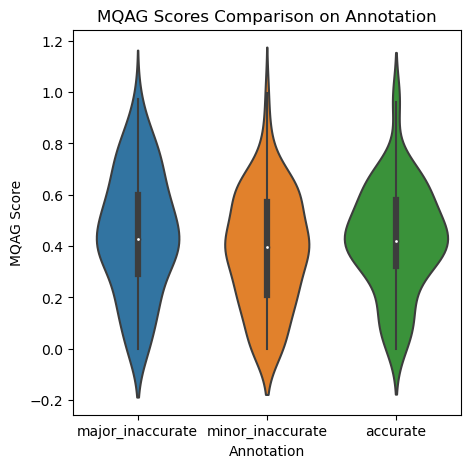

In [12]:
plt.figure(figsize = (5, 5))
sns.violinplot(x = 'Annotation', y = 'MQAG Score', data = gpt3_mqag_data)
plt.title('MQAG Scores Comparison on Annotation')
plt.savefig('MQAG Scores Comparison on Annotation.png')
plt.show()

### Comparison of the models on Unigram score

In [13]:
with open('bart-base_ngram_scores.json', 'r') as file:
    bartbase_ngram = json.load(file)
with open('t5_ngram_scores.json', 'r') as file:
    t5_ngram = json.load(file)
with open('led_ngram_scores.json', 'r') as file:
    led_ngram = json.load(file)

In [14]:
bartbase_ngram_scores, t5_ngram_scores, led_ngram_scores = [], [], []
length = min(len(gpt3_ngram['ngram']), len(bartbase_ngram['ngram']), len(led_ngram['ngram']), len(t5_ngram['ngram']))
for i in range(length):
    bartbase_ngram_scores += [np.mean(bartbase_ngram['ngram'][i]['sent_level']['avg_neg_logprob'])]
    t5_ngram_scores += [np.mean(t5_ngram['ngram'][i]['sent_level']['avg_neg_logprob'])]
    led_ngram_scores += [np.mean(led_ngram['ngram'][i]['sent_level']['avg_neg_logprob'])]
ngram_comp = pd.concat([pd.Series(gpt3_ngram_scores[:length]), pd.Series(bartbase_ngram_scores), pd.Series(t5_ngram_scores), pd.Series(led_ngram_scores)], axis = 1)
ngram_comp.columns = ['GPT-3', 'BART-base', 'T5', 'LED']

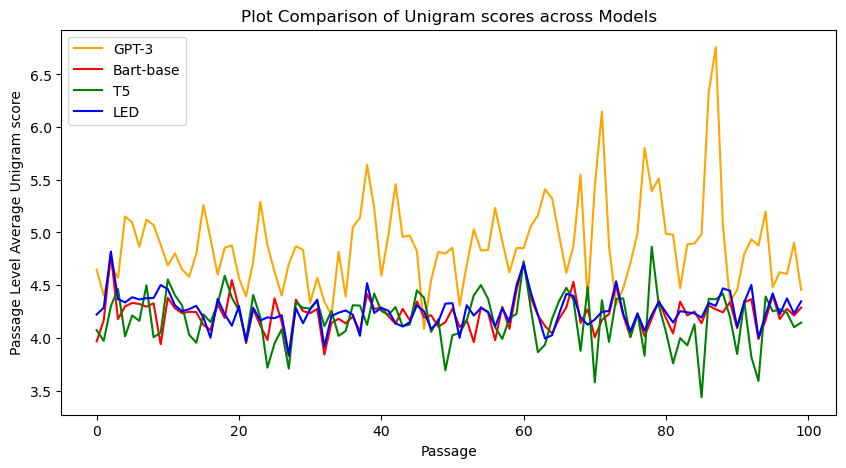

In [15]:
plt.figure(figsize = (10, 5))
plt.plot(ngram_comp['GPT-3'], color = 'orange', label = 'GPT-3')
plt.plot(ngram_comp['BART-base'], color = 'red', label = 'Bart-base')
plt.plot(ngram_comp['T5'], color = 'green', label = 'T5')
plt.plot(ngram_comp['LED'], color = 'blue', label = 'LED')
plt.xlabel('Passage')
plt.ylabel('Passage Level Average Unigram score')
plt.title('Plot Comparison of Unigram scores across Models')
plt.legend()
plt.savefig('Plot Comparison of Unigram scores across Models.png')
plt.show()

In [16]:
ngram_comp_boxplot = pd.concat([pd.Series(gpt3_ngram_scores[:length].tolist() + bartbase_ngram_scores + t5_ngram_scores + led_ngram_scores), pd.Series(['GPT-3']*length + ['BART-base']*length + ['T5']*length + ['LED']*length)], axis = 1)
ngram_comp_boxplot.columns = ['score', 'model']

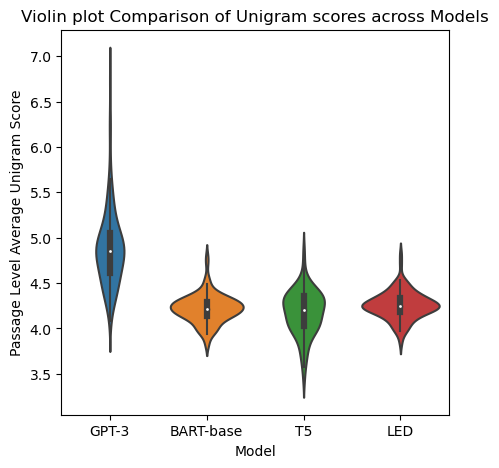

In [17]:
plt.figure(figsize = (5, 5))
sns.violinplot(x = 'model', y = 'score', data = ngram_comp_boxplot)
plt.xlabel('Model')
plt.ylabel('Passage Level Average Unigram Score')
plt.title('Violin plot Comparison of Unigram scores across Models')
plt.savefig('Violin plot Comparison of Unigram scores across Models.png')
plt.show()

### Comparison of the models on BERT score

In [18]:
with open('bart-base_bertscores.json', 'r') as file:
    bartbase_bert = json.load(file)
with open('t5_bertscores.json', 'r') as file:
    t5_bert = json.load(file)
with open('led_bertscores.json', 'r') as file:
    led_bert = json.load(file)

In [19]:
bartbase_bert_scores, t5_bert_scores, led_bert_scores = [], [], []
length = min(len(gpt3_bert['bertscore']), len(bartbase_bert['bertscore']), len(led_bert['bertscore']), len(t5_bert['bertscore']))
for i in range(length):
    bartbase_bert_scores += [np.mean(bartbase_bert['bertscore'][i])]
    t5_bert_scores += [np.mean(t5_bert['bertscore'][i])]
    led_bert_scores += [np.mean(led_bert['bertscore'][i])]
bert_comp = pd.concat([pd.Series(gpt3_bert_scores[:length]), pd.Series(bartbase_bert_scores), pd.Series(t5_bert_scores), pd.Series(led_bert_scores)], axis = 1)
bert_comp.columns = ['GPT-3', 'BART-base', 'T5', 'LED']

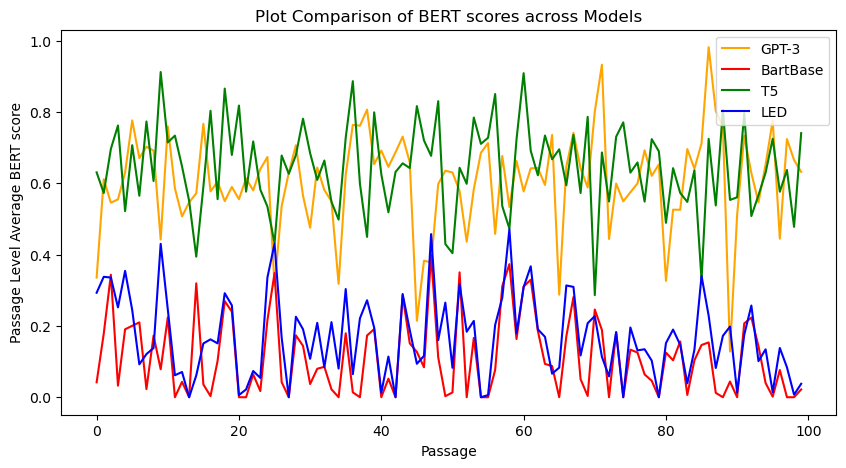

In [20]:
plt.figure(figsize = (10, 5))
plt.plot(bert_comp['GPT-3'], color = 'orange', label = 'GPT-3')
plt.plot(bert_comp['BART-base'], color = 'red', label = 'BartBase')
plt.plot(bert_comp['T5'], color = 'green', label = 'T5')
plt.plot(bert_comp['LED'], color = 'blue', label = 'LED')
plt.xlabel('Passage')
plt.ylabel('Passage Level Average BERT score')
plt.legend()
plt.title('Plot Comparison of BERT scores across Models')
plt.savefig('Plot Comparison of BERT scores across Modelspng')
plt.show()

In [21]:
bert_comp_boxplot = pd.concat([pd.Series(gpt3_bert_scores[:length] + bartbase_bert_scores + t5_bert_scores + led_bert_scores), pd.Series(['GPT-3']*length + ['BART-base']*length + ['T5']*length + ['LED']*length)], axis = 1)
bert_comp_boxplot.columns = ['score', 'model']

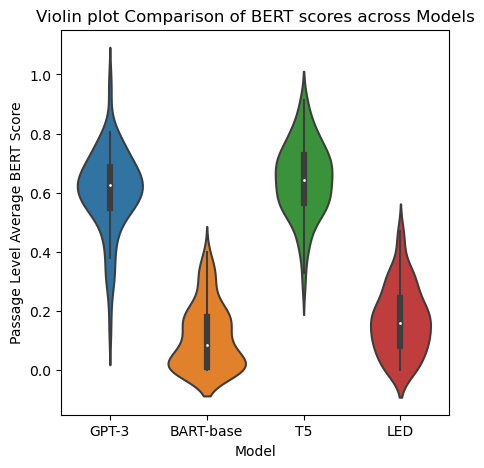

In [22]:
plt.figure(figsize = (5, 5))
sns.violinplot(x = 'model', y = 'score', data = bert_comp_boxplot)
plt.xlabel('Model')
plt.ylabel('Passage Level Average BERT Score')
plt.title('Violin plot Comparison of BERT scores across Models')
plt.savefig('Violin plot Comparison of BERT scores across Models.png')
plt.show()

### Comparison of the models on MQAG score

In [23]:
with open('bart-base_mqag_scores.json', 'r') as file:
    bartbase_mqag = json.load(file)
with open('t5_mqag_scores.json', 'r') as file:
    t5_mqag = json.load(file)
with open('led_mqag_scores.json', 'r') as file:
    led_mqag = json.load(file)

In [24]:
bartbase_mqag_scores, t5_mqag_scores, led_mqag_scores = [], [], []
length = min(len(gpt3_mqag['mqag']), len(bartbase_mqag['mqag']), len(t5_mqag['mqag']))
for i in range(length):
    bartbase_mqag_scores += [np.mean(bartbase_mqag['mqag'][i])]
    t5_mqag_scores += [np.mean(t5_mqag['mqag'][i])]
    led_mqag_scores += [np.mean(led_mqag['mqag'][i])]
mqag_comp = pd.concat([pd.Series(gpt3_mqag_scores[:length]), pd.Series(bartbase_mqag_scores), pd.Series(t5_mqag_scores), pd.Series(led_mqag_scores)], axis = 1)
mqag_comp.columns = ['GPT-3', 'BART-base', 'T5', 'LED']

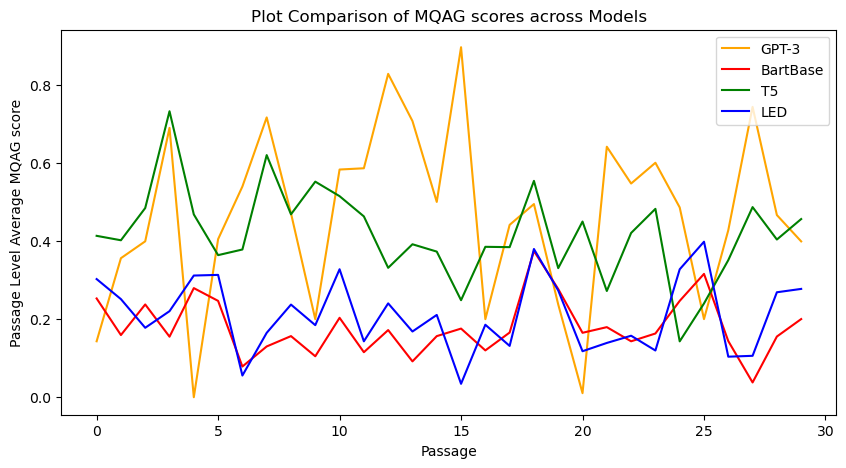

In [25]:
plt.figure(figsize = (10, 5))
plt.plot(mqag_comp['GPT-3'], color = 'orange', label = 'GPT-3')
plt.plot(mqag_comp['BART-base'], color = 'red', label = 'BartBase')
plt.plot(mqag_comp['T5'], color = 'green', label = 'T5')
plt.plot(mqag_comp['LED'], color = 'blue', label = 'LED')
plt.xlabel('Passage')
plt.ylabel('Passage Level Average MQAG score')
plt.title('Plot Comparison of MQAG scores across Models')
plt.legend()
plt.savefig('Plot Comparison of MQAG scores across Models.png')
plt.show()

In [26]:
mqag_comp_boxplot = pd.concat([pd.Series(gpt3_mqag_scores[:length] + bartbase_mqag_scores + t5_mqag_scores + led_mqag_scores), pd.Series(['GPT-3']*length + ['BART-base']*length + ['T5']*length + ['LED']*length)], axis = 1)
mqag_comp_boxplot.columns = ['score', 'model']

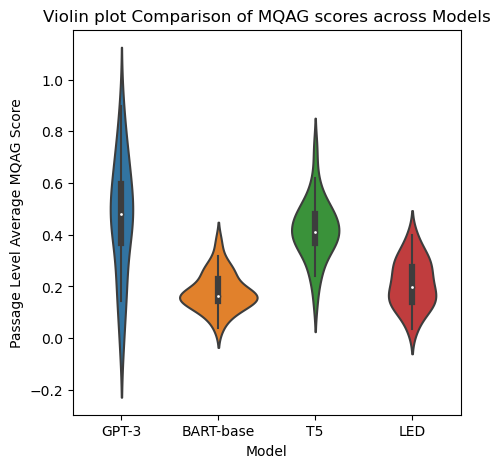

In [27]:
plt.figure(figsize = (5, 5))
sns.violinplot(x = 'model', y = 'score', data = mqag_comp_boxplot)
plt.xlabel('Model')
plt.ylabel('Passage Level Average MQAG Score')
plt.title('Violin plot Comparison of MQAG scores across Models')
plt.savefig('Violin plot Comparison of MQAG scores across Models.png')
plt.show()